In [1]:
from tensorflow import keras
import numpy as np
from keras.utils import np_utils
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras import Sequential
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
model = Sequential(name='lenet')
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(227, 227, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [3]:
model.summary()

Model: "lenet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 6)       156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 120)               539340

In [4]:
image_shape=(227,227)
train_dir="/notebooks/ultrasound/train"
validation_dir=train_dir
test_dir="/notebooks/ultrasound/val"
batch_size=64
test_train_split=0.3

train_data = image_dataset_from_directory(\
      train_dir,color_mode="grayscale",image_size=image_shape ,\
      subset='training',seed=37, validation_split=test_train_split,\
      batch_size=batch_size)
validation_data = image_dataset_from_directory(validation_dir,
      color_mode="grayscale",image_size=image_shape, subset='validation',seed=37,\
      validation_split=test_train_split,batch_size=batch_size)
test_data = image_dataset_from_directory(test_dir,
      color_mode="grayscale",image_size=image_shape, batch_size=batch_size)

Found 8116 files belonging to 2 classes.
Using 5682 files for training.
Found 8116 files belonging to 2 classes.
Using 2434 files for validation.
Found 900 files belonging to 2 classes.


In [5]:
model.compile(loss="BinaryCrossentropy", optimizer='Adam', metrics=["BinaryAccuracy"])

In [6]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [7]:
history = model.fit(train_data,
            epochs=100,
            validation_data=validation_data,callbacks=[callback])

Epoch 1/100
89/89 [==============================] - 6s 27ms/step - loss: 8.2041 - binary_accuracy: 0.7034 - val_loss: 0.3798 - val_binary_accuracy: 0.8316
Epoch 2/100
89/89 [==============================] - 2s 24ms/step - loss: 0.2248 - binary_accuracy: 0.9087 - val_loss: 0.2484 - val_binary_accuracy: 0.9051
Epoch 3/100
89/89 [==============================] - 2s 24ms/step - loss: 0.0848 - binary_accuracy: 0.9720 - val_loss: 0.2740 - val_binary_accuracy: 0.9084
Epoch 4/100
89/89 [==============================] - 2s 24ms/step - loss: 0.0432 - binary_accuracy: 0.9875 - val_loss: 0.3141 - val_binary_accuracy: 0.9039
Epoch 5/100
89/89 [==============================] - 2s 24ms/step - loss: 0.0398 - binary_accuracy: 0.9877 - val_loss: 0.3587 - val_binary_accuracy: 0.9129
Epoch 6/100
89/89 [==============================] - 2s 25ms/step - loss: 0.0167 - binary_accuracy: 0.9954 - val_loss: 0.3239 - val_binary_accuracy: 0.9244
Epoch 7/100
89/89 [==============================] - 2s 24ms/ste

In [8]:
epochs_run=len(history.epoch)

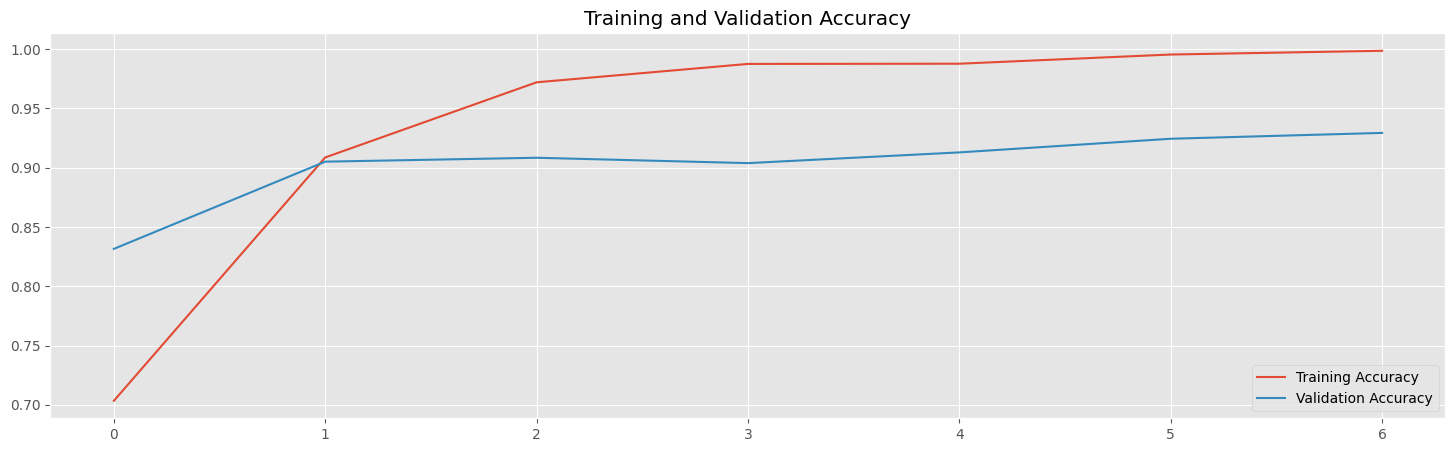

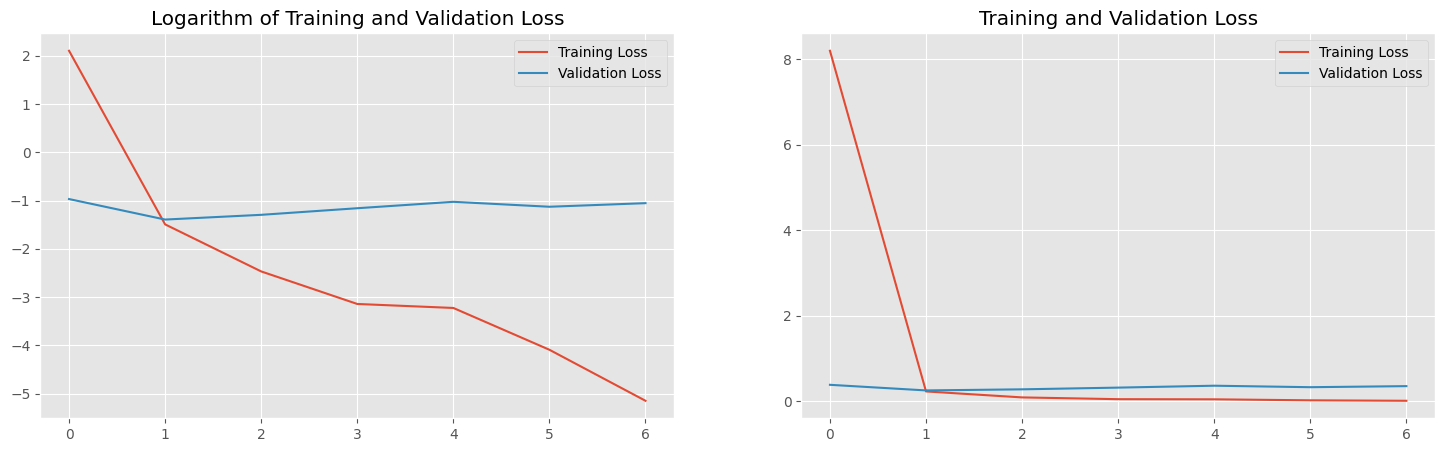

In [9]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs_run)
plt.style.use('ggplot')
plt.figure(figsize=(18, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.plot(epochs_range, np.log(loss), label='Training Loss')
plt.plot(epochs_range, np.log(val_loss), label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Logarithm of Training and Validation Loss')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

plt.show()


In [10]:
results = model.evaluate(test_data)
print("test loss, test acc:", results)

15/15 [==============================] - 0s 12ms/step - loss: 2.3377 - binary_accuracy: 0.8011
test loss, test acc: [2.337691068649292, 0.801111102104187]


In [11]:
model.save("../models/lenet5_0_ultrasound")

INFO:tensorflow:Assets written to: ../models/lenet5_0_ultrasound/assets


INFO:tensorflow:Assets written to: ../models/lenet5_0_ultrasound/assets
